### Layers
Le reti neurali organizzano tipicamente i loro neuroni in **layers** (strati). Quando raccogliamo insieme unità lineari che hanno un insieme comune di ingressi, otteniamo uno strato denso.

Una pila di tre cerchi in uno strato di input collegati a due cerchi in uno **dense layer**.
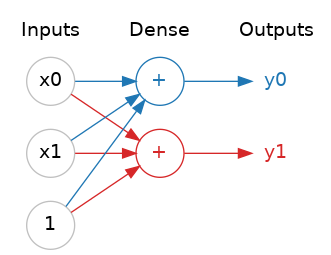

Si può pensare che ogni strato di una rete neurale esegua un tipo di trasformazione relativamente semplice. Attraverso una serie di strati profondi, una rete neurale può trasformare i suoi input in modi sempre più complessi. In una rete neurale ben addestrata, ogni strato è una trasformazione che ci porta un po' più vicino alla soluzione.

**Molti tipi di layer**: 
Un "_layer_" in **Keras** è una cosa molto generale. Un livello può essere, essenzialmente, qualsiasi tipo di trasformazione dei dati. Molti layers, come quelli **convoluzionali** e **ricorrenti**, trasformano i dati attraverso l'uso di neuroni e si differenziano principalmente per il modello di connessioni che formano. Altri, invece, sono utilizzati per **l'ingegnerizzazione delle caratteristiche** o per la semplice **aritmetica**.

### L'attivazione di funzione
Si scopre, tuttavia, che due strati densi senza nulla in mezzo non sono migliori di un singolo strato denso da solo. Gli strati densi da soli non possono mai farci uscire dal mondo delle linee e dei piani. Abbiamo bisogno di qualcosa di non lineare. Abbiamo bisogno di funzioni di attivazione.
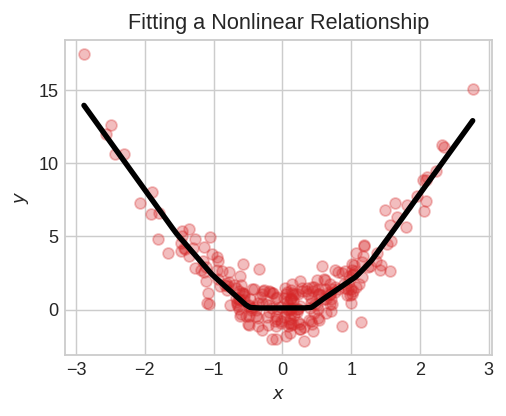

Una **funzione di attivazione** è semplicemente una funzione che applichiamo a ciascun output di uno layer (le sue attivazioni). La più comune è la funzione raddrizzatore $ max(0,x) $.
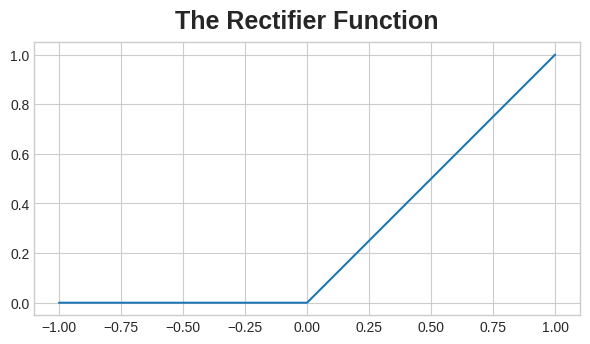

La **funzione rectifier** ha un grafico che è una linea con la parte negativa "rettificata" a zero. Applicando la funzione alle output di un neurone, i dati vengono _bend_, allontanandoci dalle linee semplici.

Quando colleghiamo il raddrizzatore a un'unità lineare, otteniamo un'unità lineare rettificata o ReLU. (Per questo motivo, si usa chiamare la funzione raddrizzatrice **funzione ReLU**). Applicando un'attivazione ReLU a un'unità lineare, l'uscita diventa $ max(0, w * x + b) $, che potremmo disegnare in un diagramma come questo:
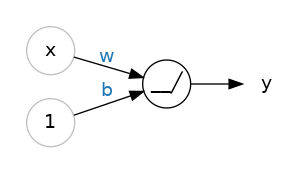

### Stacking Dense Layers
Ora che abbiamo una certa non linearità, vediamo come impilare i layers per ottenere trasformazioni complesse dei dati.
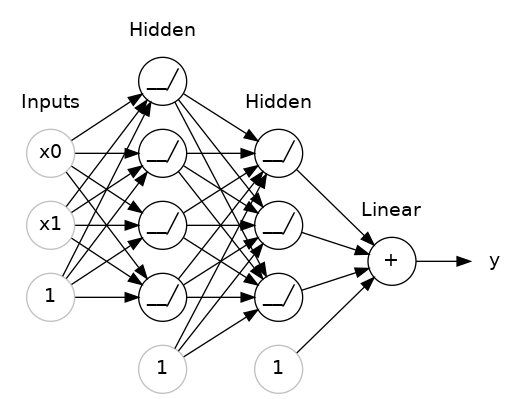

Gli strati precedenti a quello di uscita sono talvolta chiamati **hidden** (nascosti), poiché non vediamo mai direttamente le loro uscite.

Ora, si noti che lo strato finale (di uscita) è un'unità lineare (cioè senza funzione di attivazione). Ciò rende questa rete adatta a un compito di regressione, in cui si cerca di prevedere un valore numerico arbitrario. Altri compiti (come la classificazione) potrebbero richiedere una funzione di attivazione in uscita.

### Costruire Seuntial Model
Il **modello sequenziale** che abbiamo utilizzato collegherà insieme un elenco di livelli in ordine dal primo all'ultimo: il primo livello riceve l'input, l'ultimo produce l'output. Questo crea il modello della figura precedente:

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

Assicurarsi di passare tutti i livelli insieme in un elenco, come [layer, layer, layer, ...], invece che come argomenti separati. Per aggiungere una funzione di attivazione a un livello, è sufficiente indicare il suo nome nell'argomento attivazione.

## Esercizi

In [2]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize = 'large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex2 import *

E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex2.py:126: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dense']


Importare i dati

In [3]:
import pandas as pd

concrete = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


 ### Input Shape
 L'obiettivo di questo compito è la colonna '**CompressiveStrength**'. Le colonne rimanenti sono le caratteristiche che utilizzeremo come input.

Quale sarebbe la forma di input per questo set di dati?

In [5]:
# YOUR CODE HERE
len_columns = len(concrete.columns)

input_shape = [len_columns-1] # columns -1 e lista

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Definisci un Modello con Hidden Layers
Creare ora un modello con tre strati nascosti, ciascuno con 512 unità e **l'attivazione ReLU**. Assicuratevi di includere un livello di uscita con una sola unità e nessuna attivazione, e anche **input_shape** come argomento del primo livello.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),    
    layers.Dense(1),
])

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Activation Layer
Esploriamo un po' le funzioni di attivazione.

Il modo abituale di associare una funzione di attivazione a un livello **Dense** è quello di includerla come parte della definizione con l'argomento **activation**. A volte, però, si vuole inserire un altro livello tra il livello **Dense** e la sua funzione di **Activation**. (In questo caso, si può definire l'attivazione nel proprio livello di attivazione, come segue:
$$
layers.Dense(units=8),
$$ $$
strati.Activazion('relu')
$$
Questo è completamente equivalente al modo ordinario: $ layers.Dense(units=8, activation='relu'). $

Riscrivete il modello seguente in modo che ogni attivazione sia nel proprio **Layer Activation**.

In [7]:
### YOUR CODE HERE: rewrite this to use activation layers
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
]) 

# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Alternative a ReLU
Esiste un'intera famiglia di varianti dell'attivazione '**relu**' come '**elu**', '**selu**' e '**swish**', tra le altre, tutte utilizzabili in **Keras**. A volte un'attivazione è più efficace di un'altra in un determinato compito, quindi si può pensare di sperimentare le attivazioni durante lo sviluppo del modello. L'attivazione ReLU tende a dare buoni risultati nella maggior parte dei problemi, quindi è una buona attivazione per iniziare.

Vediamo i grafici di alcuni di questi. Cambiate l'attivazione da '**relu**' a una delle altre sopra citate. Quindi eseguire la cella per vedere il grafico.

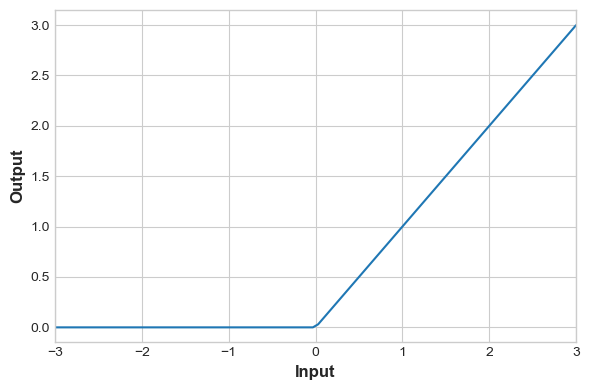

In [8]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()